<a href="https://colab.research.google.com/github/vignan8279/Deep_learning_fastai/blob/master/fast_ai_practice_SGD_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

In [0]:
%matplotlib inline

In [0]:
from fastai.basics import *

In [0]:
n = 150

In [29]:
x = torch.ones(n,2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[0.6405, 1.0000],
        [0.8260, 1.0000],
        [0.4976, 1.0000],
        [0.3419, 1.0000],
        [0.7667, 1.0000]])

In [30]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

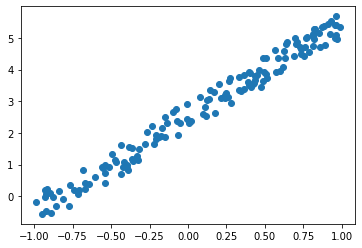

In [32]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [36]:
a = tensor(-1.,1)
a.type()

'torch.FloatTensor'

In [37]:
y_hat = x@a
mse(y_hat, y)

tensor(9.0934)

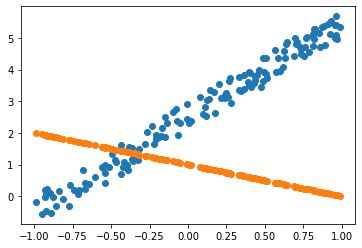

In [38]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat);

In [40]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t%10 == 0 : print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_() 

In [43]:
lr = 1e-1
for t in range(150): update()

tensor(9.0934, grad_fn=<MeanBackward0>)
tensor(1.2910, grad_fn=<MeanBackward0>)
tensor(0.3663, grad_fn=<MeanBackward0>)
tensor(0.1455, grad_fn=<MeanBackward0>)
tensor(0.0902, grad_fn=<MeanBackward0>)
tensor(0.0763, grad_fn=<MeanBackward0>)
tensor(0.0729, grad_fn=<MeanBackward0>)
tensor(0.0720, grad_fn=<MeanBackward0>)
tensor(0.0718, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)


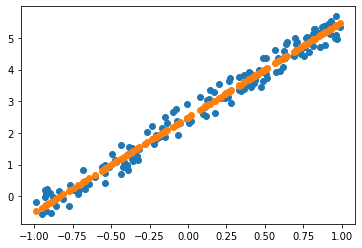

In [46]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [58]:
a = nn.Parameter(tensor(-1.,1))
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval = 20)